In [ ]:
"""
A comprehensive tutorial towards 2D convolution and image filtering
(The first step to understand Convolutional Neural Networks (CNNs)).
"""
import os
import cv2
import numpy as np

IMAGES_PATH = 'car-1.jpg'

def load_image(image_path):
    """
    Load the image using opencv
    :param image_path: <String> Path of input_image
    :return a numpy array of size [image_height, image_width]
    """
    # Create the Image directory to save any plots
    if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    coloured_image = cv2.imread(image_path)
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    print('image matrix size: ', grey_image.shape)
    print('\n First 5 columns and rows of the image matrix: \n', grey_image[:5, :5])
    # cv2.imwrite('TopLeft5x5.jpg', grey_image[:5, :5])
    return grey_image


def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

input_image = load_image('car-1.jpg')

# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)
cv2.imwrite(IMAGES_PATH + 'car-1.jpg', image_sharpen)

# kernel to be used for edge detection
image_edge1 = convolve2d(input_image, kernel=np.array([[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]]))
cv2.imwrite(IMAGES_PATH + 'car-1.jpg', image_edge1)

image_edge2 = convolve2d(input_image, kernel=np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]]))
cv2.imwrite(IMAGES_PATH + 'car-1.jpg', image_edge2)

# kernel to be used for box blur
imageboxblur = convolve2d(input_image, kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0)
cv2.imwrite(IMAGES_PATH + 'car-1.jpg', imageboxblur)

# kernel to be used for gaussian blur
imagegaussianblur = convolve2d(input_image, kernel=np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0)
cv2.imwrite(IMAGES_PATH + 'car-1.jpg', imagegaussianblur)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
pip install opencv-python

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/car-1.jpg')

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])



In [ ]:
image = cv2.imread('car-1.jpg')
if image is None:
    print("Error: Image not loaded. Please check the file path and try again.")
else:
    convolved_image = cv2.filter2D(image, -1, kernel)


Error: Image not loaded. Please check the file path and try again.


In [ ]:


plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(convolved_image, cv2.COLOR_BGR2RGB)), plt.title('Convolved Image')
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/filter.dispatch.cpp:1528: error: (-215:Assertion failed) !_src.empty() in function 'filter2D'


Saving lamborghini-countach-4k-laptop-car-shmy94g9cpmm3zje.jpg to lamborghini-countach-4k-laptop-car-shmy94g9cpmm3zje.jpg


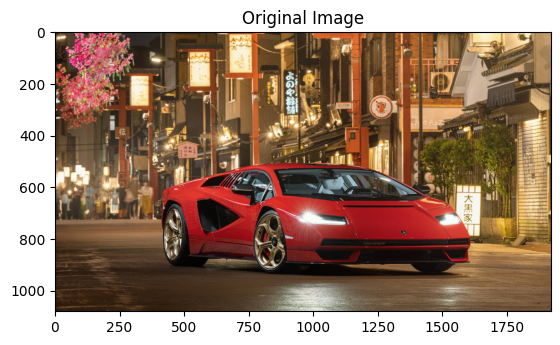

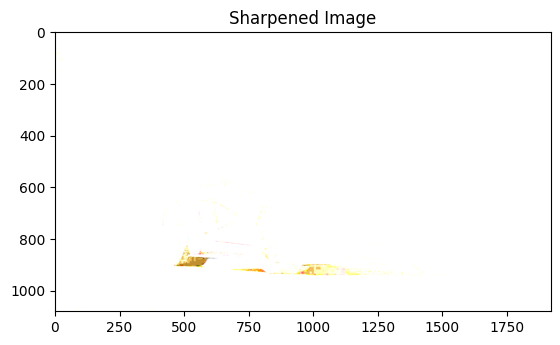

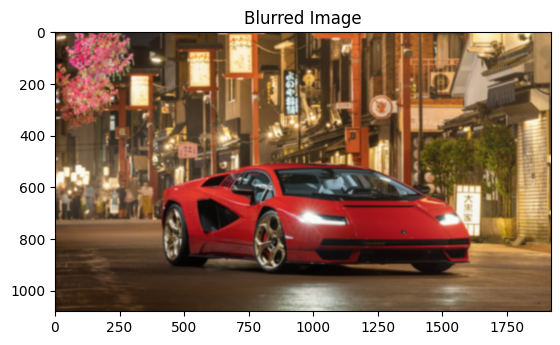

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()


image_path = list(uploaded.keys())[0]


image = cv2.imread(image_path)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()


kernel = np.array([[0, 8, 0],
                   [8, 16, 8],
                   [0, 8, 0]])

sharpened_image = cv2.filter2D(image, -1, kernel)

plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.show()

blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Display the blurred image
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.show()


## **Representation of colour images**

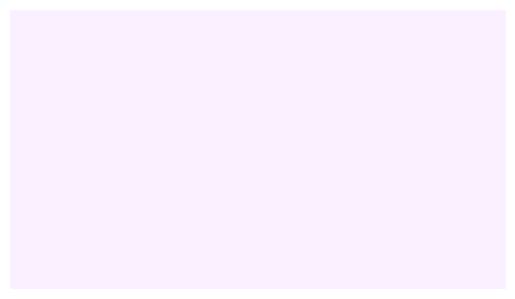

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = Image.open('/content/car -1.jpg').convert('RGB')

# Define the new RGB value
new_rgb = (250, 240, 2250)  # Example: Red color

# Create a new image with the same size
new_img = Image.new('RGB', img.size, new_rgb)

# Convert to numpy array for matplotlib
new_img_array = np.array(new_img)

# Display the result using matplotlib
plt.imshow(new_img_array)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
